<a href="https://colab.research.google.com/github/iurymk/Random_Forest/blob/main/Random_Forest_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

Para introduzir o modelo Random Forest (Floresta aleatória) é interessante introduzir o conceito de Decision Tree Regression.

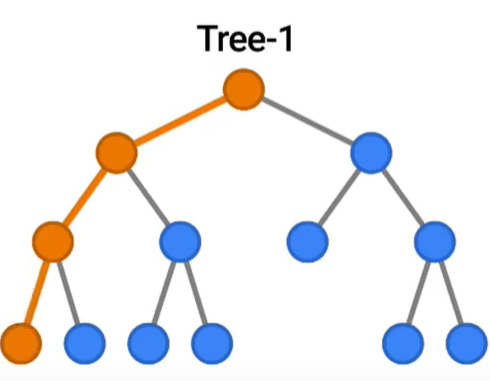

A imagem mostra uma árvore de decisão com o nome "Tree-1". Cada nó na árvore representa uma decisão com base em um recurso dos dados. As linhas que conectam os nós representam os diferentes caminhos que os dados podem seguir na árvore. Abaixo, inicio utilizando o modelo Decision Tree Regressor para introdução dos conceitos e comparação com o Random Forest, que basicamente, utiliza diversas árvores e pega um valor médio do resultado de cada árvore como resposta final, como na imagem abaixo.


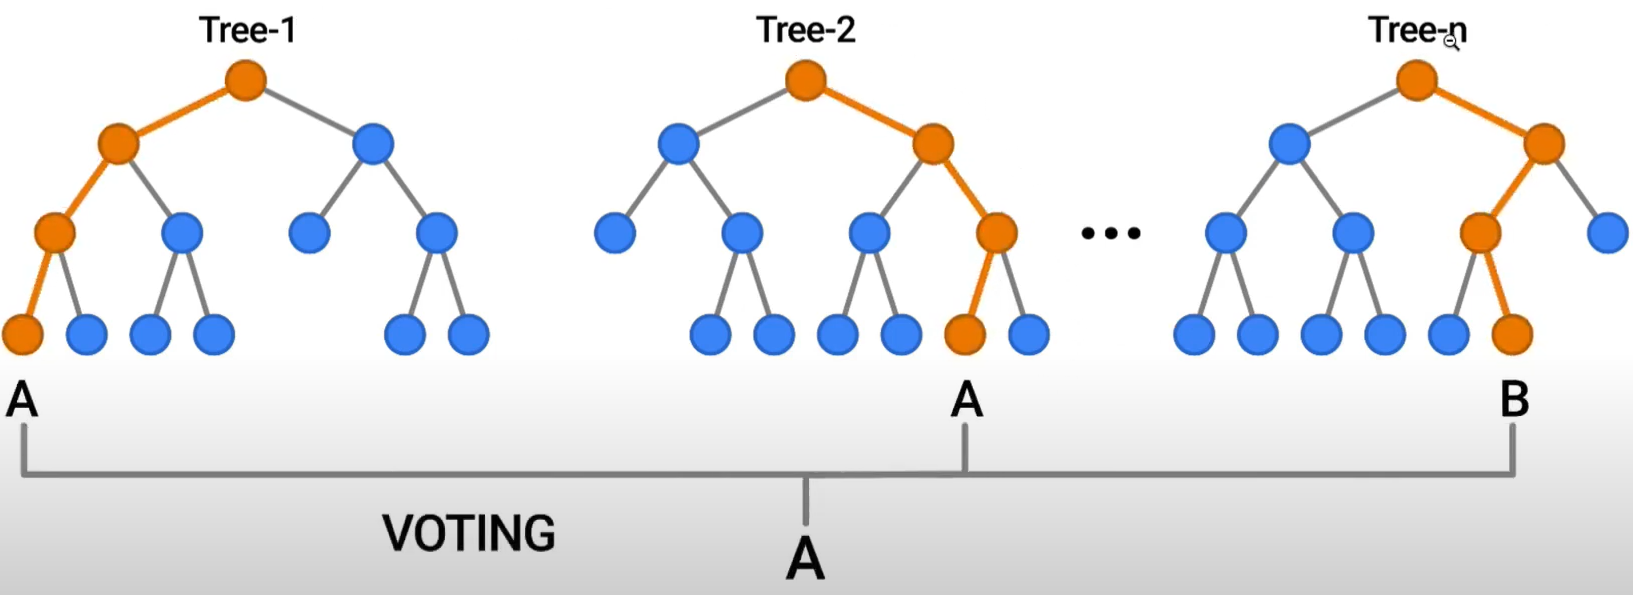

In [210]:
# Essa célula importa o que precisa do ambiente Kaggle. É obtida localmente : open in colab ()
# Também é possível simplesmente fazer dowload do dados do Kaggle e subir para o Colab
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'home-data-for-ml-course:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F10211%2F111096%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240603%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240603T162624Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4172db5871a30a9c26864ebf45e17cad3dbd03e29c0de72017a80c9d7193ddbd1fbefc66e14126e7be740a7517aa64ada24b2c16fa45d8dae2830d06316e57675ae2555842a2bbde64ed75eff8b525d6aba22b608736e4234677355d33abb7e0ebfabdf32ae5ee28d5b114bd9a51070b245da016360dfb3cdaa62a0dd6f9cff3a8dca92edf9e214b565aa94a6d6517717b30b65c14f6c00a045954d7a3766754bcc4aa9833b24160334e35496e4e5cc93272b895aade244b9b3a81dd2b5cc71f0db3e28cfd3ef18fa2c70e7097c91fa5e3d02a7e5a65d1f2f430fe700d704f5c9f223071520c8d30460a738dc0ff8aad024da3c938eb790b3fa19729093c82dd,mobile-price-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F11167%2F15520%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240603%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240603T162624Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7f5c7d97bfb7be9bc290354d30ec01c5ce04275d1359ee192a7c6328ca4f0e0b11a4e40b3256a38319dd6aa1bf6a1fc3624618128249574c628a75f03632a347d4a9f44a5e0b45841ea4d3e0890c440f72a722d729d8157cc51b0123045790e0d4ae22f646e12fb29624183a75b68f941f1b37defd58c8072f9df129a88d04dc3a694497a66625808dd4f0a2bcc2aefbf584afb20694c49a38a9ee03f4b4692f32c010eac3a1696219601f485dbc0c7b2765933ed3ded746618e4a09f5224d9a158c8d778242db2d2c300033de8aa7c140c6d9085a4bb5dbc925cee328c6da0845b1afaaee18990950f94a97af358cad3b14d93bb33b7421d20f4ff5d1598ae8,melbourne-housing-snapshot:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2709%2F38454%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240603%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240603T162624Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D58a45d0fa0ea7e2fcc923afaa1b743b0d63d1793ed063b75b92798a399a6722c42f0f2d045382b8eb531c5f0e225edac08d6e11196bfaa0fc9839bce5995963a5f3ec4666ee4fef93b98db73527813f83c25a2ea74a493ef528feb765d6b246c58aba5e60e166fb93232e6a0f5852dfce3692df243416bfae203fa1c3a7e93acb4de34e057c7aa4012cafe37eff82674fa084cdc839a482b3ac992ec001f2c25c2ff72f205ee5eb69270e391c17cc03169cbeaa790b49145403ee428a05fb6e09249985a2bbffb1bd806209e1cf0df24f6fe6996f0bac4a4cc3057d187596adb988888cda2d297371de4242195c0e07a98a6eb57ca4aebd835e62dd5b3597716'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 395336 bytes downloaded
Downloaded and uncompressed: home-data-for-ml-course
[==================================================] 72340 bytes downloaded
Downloaded and uncompressed: mobile-price-classification
[==================================================] 461423 bytes downloaded
Downloaded and uncompressed: melbourne-housing-snapshot
Data source import complete.


Dados sobre preços de casas em Melbourne, Austrália.

Objetivo: predizer preços das casas com base em 5 características ('Quartos', 'Banheiro', 'Tamanho do terreno', 'Latitude', 'Longitude')

In [211]:
import pandas as pd


melbourne_data = pd.read_csv('../input/melbourne-housing-snapshot/melb_data.csv')

melbourne_data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


# **Descrição dos dados**

In [212]:
melbourne_data.shape
#(linhas, colunas)

(13580, 21)

In [213]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [214]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Os resultados mostram 8 linhas para cada coluna no seu conjunto de dados original.

A primeira linha, a contagem **count**, mostra quantas linhas têm valores não ausentes. Valores ausentes surgem por muitos motivos. Por exemplo, o tamanho do 2º quarto não seria coletado ao pesquisar uma casa de 1 quarto.

 Abaixo, o valor médio **mean** e std, que é o desvio padrão, que mede o quão numericamente espalhados os valores estão.

Para interpretar os valores mínimo, 25%, 50%, 75% e máximo, imagine classificar cada coluna do menor para o maior valor. O primeiro (menor) valor é o mínimo. Se você percorrer um quarto da lista, encontrará um número maior que 25% dos valores e menor que 75% dos valores. Esse é o valor de 25% (pronuncia-se "25º percentil"). Os percentis 50 e 75 são definidos analogamente, e o máximo é o maior número.

Neste caso, será usada a opção mais simples para lidar com **dados ausentes**

In [215]:
# dropna remove valores ausentes (pense em na como "não disponível")
melbourne_data = melbourne_data.dropna(axis = 0)

# Passo 1: Especificar o y (Prediction Target)

Você pode extrair uma variável com notação de ponto. Essa única coluna é armazenada como um DataFrame com apenas uma única coluna de dados.

Abaixo é selecionada a coluna que queremos prever, que é chamada de Prediction Target. Portanto, o código que precisamos para salvar os preços das casas nos dados de Melbourne é

In [216]:
#Por convenção estes dados são chamados de y
y = melbourne_data.Price
print(y.head())


1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64


# Passo 2: Criando o X (features)

As colunas que são inseridas no modelo são chamas de "features".
Neste caso, seleciono apenas algumas colunas para determinar o preço das casas.


In [217]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
#Por convenção estes dados são chamados de X
X = melbourne_data[melbourne_features]

### Revisando dados:

In [218]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


# Passo 3: Especificar e treinar (Fit) o modelo

Scikit-learn é a biblioteca mais popular para modelar dados normalmente armazenados em DataFrames.

As etapas para construir um modelo são:

**Definir:** Que tipo de modelo será? Uma árvore de decisão? Algum outro tipo de modelo? Alguns outros parâmetros do tipo de modelo também são especificados.

**Fit (treinar):** Capture padrões de dados fornecidos. Este é o coração da modelagem.

**Predizer:** Exatamente o que parece

**Avaliar:** determine o quão precisas são as previsões do modelo.

In [219]:
from sklearn.tree import DecisionTreeRegressor

# Define o modelo. Especifica o random_state (estado aleatório) para garantir os mesmos resultados em cada execução
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Agora tenho um modelo ajustado que podemos usar para fazer previsões.

Na prática, queremos fazer previsões para novas casas que chegam ao mercado, em vez das casas para as quais já temos preços. Mas faremos previsões para as primeiras linhas dos dados de treinamento para ver como a função de previsão funciona.



# Etapa 4: Fazer previsões



In [220]:
# Passando as features (X) para as predições dos preços

#Retomando: passaei as features para a variável X, informei o target y e treinei o modelo.
#A variável val_predict armazena os valores preditos, após passado as features (neste caso os mesmo valores de treino)
val_predict = melbourne_model.predict(X)

In [221]:
# A função display deixa os dados organizados numa tabela mais legal
print("Features das 5 primeiras casas:")
display(X.head(5))
print("As previsões são:")
X_predict = melbourne_model.predict(X)
print(X_predict)

Features das 5 primeiras casas:


,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


As previsões são:
[1035000. 1465000. 1600000. ...  385000.  560000. 2450000.]


# Model Validation

Uma métrica para validação é o MAE (Erro Absoluto Médio).  

In [222]:
erro = y - val_predict # preços reais - preços preditos
erro_abs = erro.abs()
MAE = erro_abs.mean()
print(MAE)

1115.7467183128902


O sktlearn oferece uma biblioteca que calcula isso automaticamente:

In [223]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(y, val_predict)

print(val_mae)

1115.7467183128902


Neste exemplo, os dados não foram dividios em dados e teste e validação. Os dados que treinam o modelo foram utilizados para fazer as previsões. Por este motivo, é óbvio que o modelo irá acertar, mas pode não gerar bons resultados para dados que ele não conhece. Esse problema é chamado de "In-Sample" Scores.

### Divisão em dados de treino e validação
A biblioteca scikit-learn tem uma função train_test_split para dividir os dados em duas partes. Usaremos alguns desses dados como dados de treinamento para ajustar o modelo, e usaremos os outros dados como dados de validação para calcular mean_absolute_error.

In [224]:
from sklearn.model_selection import train_test_split

# Dividindo os dados
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define o modelo
melbourne_model = DecisionTreeRegressor(random_state = 1)
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
MAE_split = mean_absolute_error(val_y, val_predictions)
print(MAE_split)

273518.01872175594


Calcular o erro médio absoluto em dados de validação

In [225]:
print("MAE dados sem validação", MAE)
print("MAE dados com validação", MAE_split)


MAE dados sem validação 1115.7467183128902
MAE dados com validação 273518.01872175594


# Underfitting and Overfitting


**Overfitting:** ocorre quando um modelo se adapta excessivamente aos dados de treinamento, memorizando padrões específicos em vez de aprender as características gerais dos dados. Como resultado, o modelo apresenta um desempenho excepcional no conjunto de treinamento, mas falha miseravelmente quando confrontado com novos dados não vistos durante o treinamento.

**Underfitting:** ocorre quando um modelo não aprende suficientemente os dados de treinamento. Isso resulta em um desempenho ruim tanto no conjunto de treinamento quanto em novos dados, pois o modelo não foi capaz de capturar as características relevantes dos dados.

Os gráficos MAE x tree depths são úteis para encontrar o equilíbrio ideal entre a capacidade de aprendizado e a generalização do modelo.

Ajustando o modelo para descobrir o melhor tamanho da árvore com a função max_leaf_nodes: essa função controla o crescimento da árvore e a complexidade do modelo. Ela define o número máximo de folhas que a árvore pode ter durante o processo de treinamento, sendo uma maneira (apenas umas delas) sensata de controlar o underfiting vs overfiting.

In [226]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

#obtendo diretamente o MAE por uma função e aplicar max_leaf_nodes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1) #define modelo
    model.fit(train_X, train_y) # treina modelo
    preds_val = model.predict(val_X) # predição dos valores
    mae = mean_absolute_error(val_y, preds_val) # calcula o erro
    return(mae)

# comparar MAE com valores diferentes de max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  260235
Max leaf nodes: 5000  		 Mean Absolute Error:  273303


Perceba que o erro absoluto médio começa a aumentar depois de max_leaf_nodes = 500, ou seja, os dados estão overfitando. Para max_leaf_nodes = 5, os dados não generalizam o suficiente e o erro absoluto médio é grande também, caracterizando underfiting.

Escolhendo o melhor tamanho da árvore:

In [239]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 5000]

erro = 1e10 # erro bem grande só pra começar a variável de iteração
for candidate in candidate_max_leaf_nodes:
    erro_do_candidato = get_mae(candidate, train_X, val_X, train_y, val_y)
    if erro_do_candidato < erro:
        erro = erro_do_candidato
        best_tree_size = candidate
    print("Candidato: ", candidate, "Erro do candidato: ", erro_do_candidato, "Melhor erro geral: ", erro )
print("")
print("A melhor escolha para tamanho da árvore (max_leaf_nodes) = ", best_tree_size, "Com erro global = ", erro_do_candidato)

Candidato:  5 Erro do candidato:  385696.54278937966 Melhor erro geral:  385696.54278937966
Candidato:  25 Erro do candidato:  307919.7001056724 Melhor erro geral:  307919.7001056724
Candidato:  50 Erro do candidato:  279794.61143891385 Melhor erro geral:  279794.61143891385
Candidato:  100 Erro do candidato:  267978.30318055797 Melhor erro geral:  267978.30318055797
Candidato:  250 Erro do candidato:  267540.4286450778 Melhor erro geral:  267540.4286450778
Candidato:  500 Erro do candidato:  260235.05178963946 Melhor erro geral:  260235.05178963946
Candidato:  5000 Erro do candidato:  273303.2892188509 Melhor erro geral:  260235.05178963946

A melhor escolha para tamanho da árvore (max_leaf_nodes) =  500 Com erro global =  273303.2892188509


# Random Forest

Finalmente, vou utilziar o modelo Random Forest para ver se melhora os resultados. A única coisa que muda no código é na hora definir o modelo.

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print("Erro Absoluto Médio: ", mean_absolute_error(val_y, melb_preds))

Erro Absoluto Médio:  207190.6873773146


In [240]:
def get_mae_rf(max_leaf_nodes, train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    forest_model.fit(train_X, train_y)
    preds_val = forest_model.predict(val_X) # predição dos valores
    mae = mean_absolute_error(val_y, preds_val) # calcula o erro
    return(mae)

# comparar MAE com valores diferentes de max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000, 10000]:
    my_mae = get_mae_rf(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  375869
Max leaf nodes: 50  		 Mean Absolute Error:  252233
Max leaf nodes: 500  		 Mean Absolute Error:  208267
Max leaf nodes: 5000  		 Mean Absolute Error:  206811
Max leaf nodes: 10000  		 Mean Absolute Error:  206811


Comparando os dois modelos (Decision Tree Regressor e Random Forest):

In [243]:
print()
print("Erro Absoluto Médio Random Forest: ", mean_absolute_error(val_y, melb_preds))
print("Erro Absoluto Médio Decision Tree Regressor:", erro_do_candidato)


Erro Absoluto Médio Random Forest:  207190.6873773146
Erro Absoluto Médio Decision Tree Regressor: 273303.2892188509


# Conclusão

Neste código foram alterados dois hiperparâmetros: tamanho da árvore e o modelo. A melhor escolha para tamanho da árvore (max_leaf_nodes) em Decision Tree Regressor =  500 , Com erro global (MAE) =  273303.2892188509 (apesar de parecer haver um erro no loop). Para o modelo Random Forest a melhor escolha para tamanho da árvore (max_leaf_nodes) = 5000 , Com erro global (MAE) =  206811. Portanto o modelo teve um MAE menor e pareceu se beneficiar de uma profundidade maior. O que não parece bem é que nos dois casos não se atingiu o overfiting, os modelos estabilizaram nos resultados. Possivelmente há algum erro sutil, considerando que este notebook é apenas um objeto de estudos futuros e meu primeiro modelo de ML.